<a href="https://colab.research.google.com/github/lauralu521/64060/blob/master/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1**

Downloading the data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os, shutil, pathlib

new_base_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")

Mounted at /content/drive


Building the model.

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

Configuring the model for training.

In [4]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Data preprocessing.

In [5]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir  / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir  / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
   new_base_dir  / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Start initially with a training sample of 1000.

In [6]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [7]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [8]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [9]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


Displaying the shapes of the data and labels yielded by the Dataset.

In [10]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Fitting the model using a Dataset.

In [11]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 301s 5s/step - loss: 0.7259 - accuracy: 0.5160 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 8s 121ms/step - loss: 0.6928 - accuracy: 0.5200 - val_loss: 0.7236 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 7s 103ms/step - loss: 0.6973 - accuracy: 0.5560 - val_loss: 0.6760 - val_accuracy: 0.5490
Epoch 4/30
63/63 [==============================] - 7s 103ms/step - loss: 0.6670 - accuracy: 0.6025 - val_loss: 0.6710 - val_accuracy: 0.6250
Epoch 5/30
63/63 [==============================] - 8s 123ms/step - loss: 0.6416 - accuracy: 0.6395 - val_loss: 0.6529 - val_accuracy: 0.6120
Epoch 6/30
63/63 [==============================] - 7s 112ms/step - loss: 0.6136 - accuracy: 0.6750 - val_loss: 0.6348 - val_accuracy: 0.6360
Epoch 7/30
63/63 [==============================] - 8s 111ms/step - loss: 0.5595 - accuracy: 0.7155 - val_loss: 0.8768 - val_accuracy: 0.5580
Epoch 8

Displaying curves of loss and accuracy during training.

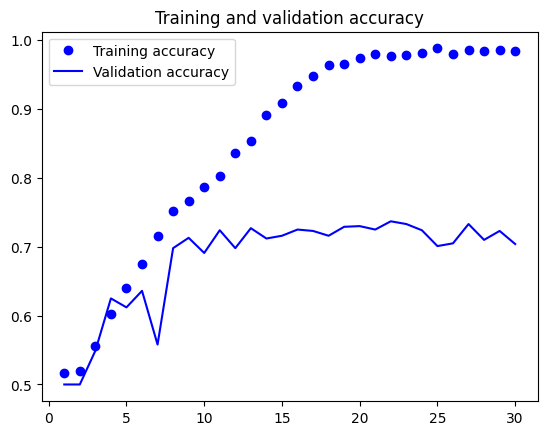

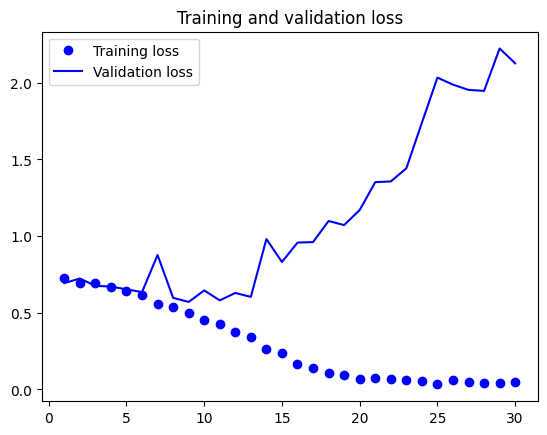

In [12]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [13]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 152s 4s/step - loss: 0.5957 - accuracy: 0.7080
Test accuracy: 0.708


**Define a data augmentation stage to add to an image model**

In [14]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

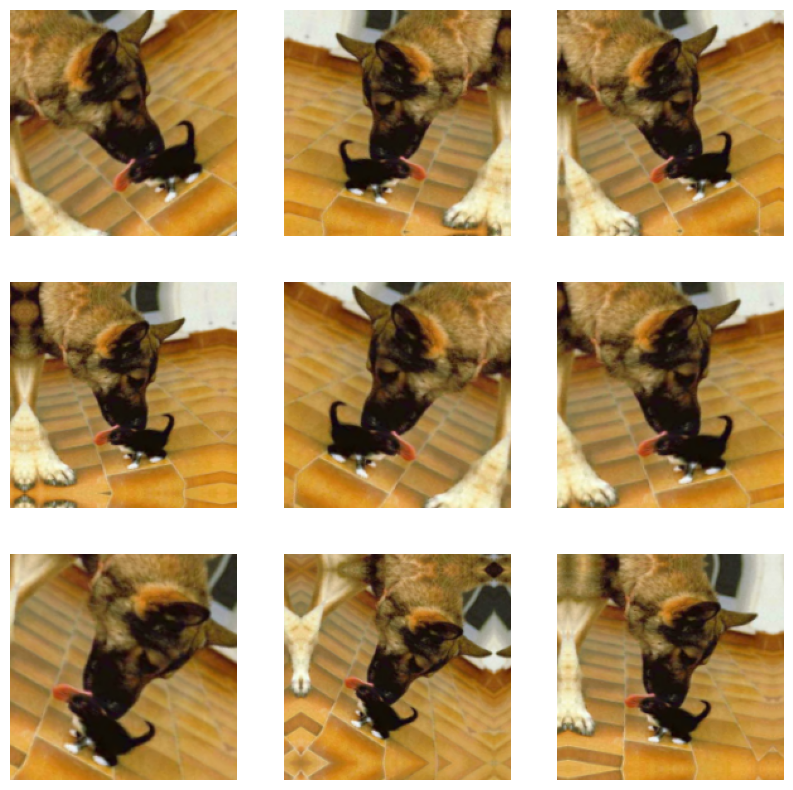

In [15]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [16]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [17]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 11s 126ms/step - loss: 0.6966 - accuracy: 0.5110 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 8s 117ms/step - loss: 0.6937 - accuracy: 0.5025 - val_loss: 0.6894 - val_accuracy: 0.5330
Epoch 3/100
63/63 [==============================] - 7s 107ms/step - loss: 0.6924 - accuracy: 0.5320 - val_loss: 0.6831 - val_accuracy: 0.5940
Epoch 4/100
63/63 [==============================] - 8s 125ms/step - loss: 0.6842 - accuracy: 0.5670 - val_loss: 0.6672 - val_accuracy: 0.6300
Epoch 5/100
63/63 [==============================] - 8s 113ms/step - loss: 0.6604 - accuracy: 0.6235 - val_loss: 0.6764 - val_accuracy: 0.5920
Epoch 6/100
63/63 [==============================] - 7s 104ms/step - loss: 0.6341 - accuracy: 0.6515 - val_loss: 0.6369 - val_accuracy: 0.6270
Epoch 7/100
63/63 [==============================] - 7s 105ms/step - loss: 0.6239 - accuracy: 0.6680 - val_loss: 0.6015 - val_accuracy: 0.665

**Evaluating the model on the test set**

In [18]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 53ms/step - loss: 0.4669 - accuracy: 0.8140
Test accuracy: 0.814


Question 1      Before dropout and data augmentation, our accuray is 71%, but after we use data augmentation and dropout, we achieved 81% accuary. Thus, we get 10% performance improvement.

**Question 2**


Downloading the data.

In [19]:
from google.colab import drive
drive.mount('/content/drive')
import os, shutil, pathlib

new_base_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Building the model.

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [21]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

Configuring the model for training.

In [22]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Data preprocessing.

In [23]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir  / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir  / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
   new_base_dir  / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Decrease the training sample to 500.

In [24]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(500, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [25]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [26]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [27]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


Displaying the shapes of the data and labels yielded by the Dataset.

In [28]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Fitting the model using a Dataset.

In [29]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 9s 105ms/step - loss: 0.7009 - accuracy: 0.5025 - val_loss: 0.6930 - val_accuracy: 0.5760
Epoch 2/20
63/63 [==============================] - 8s 121ms/step - loss: 0.7075 - accuracy: 0.5085 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 3/20
63/63 [==============================] - 7s 111ms/step - loss: 0.6930 - accuracy: 0.5265 - val_loss: 0.6895 - val_accuracy: 0.5200
Epoch 4/20
63/63 [==============================] - 8s 109ms/step - loss: 0.6883 - accuracy: 0.5500 - val_loss: 0.6577 - val_accuracy: 0.6510
Epoch 5/20
63/63 [==============================] - 8s 122ms/step - loss: 0.6575 - accuracy: 0.6140 - val_loss: 0.6488 - val_accuracy: 0.6360
Epoch 6/20
63/63 [==============================] - 10s 151ms/step - loss: 0.6260 - accuracy: 0.6480 - val_loss: 0.7438 - val_accuracy: 0.5380
Epoch 7/20
63/63 [==============================] - 7s 102ms/step - loss: 0.5916 - accuracy: 0.6840 - val_loss: 0.5890 - val_accuracy: 0.6960
Epoch

Displaying curves of loss and accuracy during training.

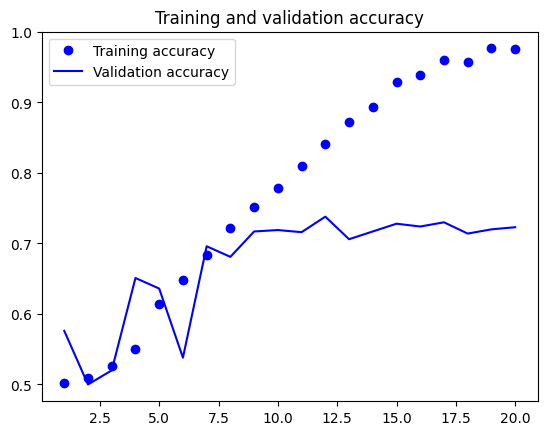

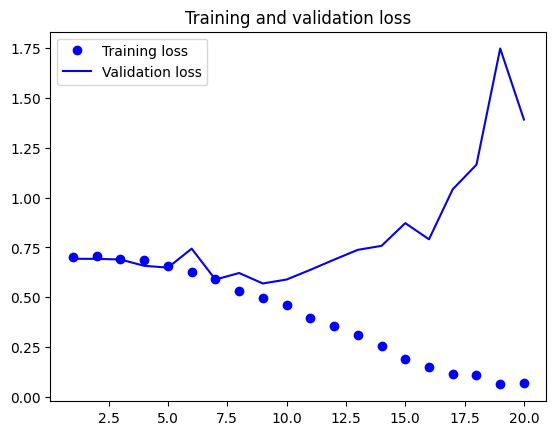

In [30]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [31]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 54ms/step - loss: 0.5892 - accuracy: 0.7050
Test accuracy: 0.705


**Define a data augmentation stage to add to an image model**

In [32]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

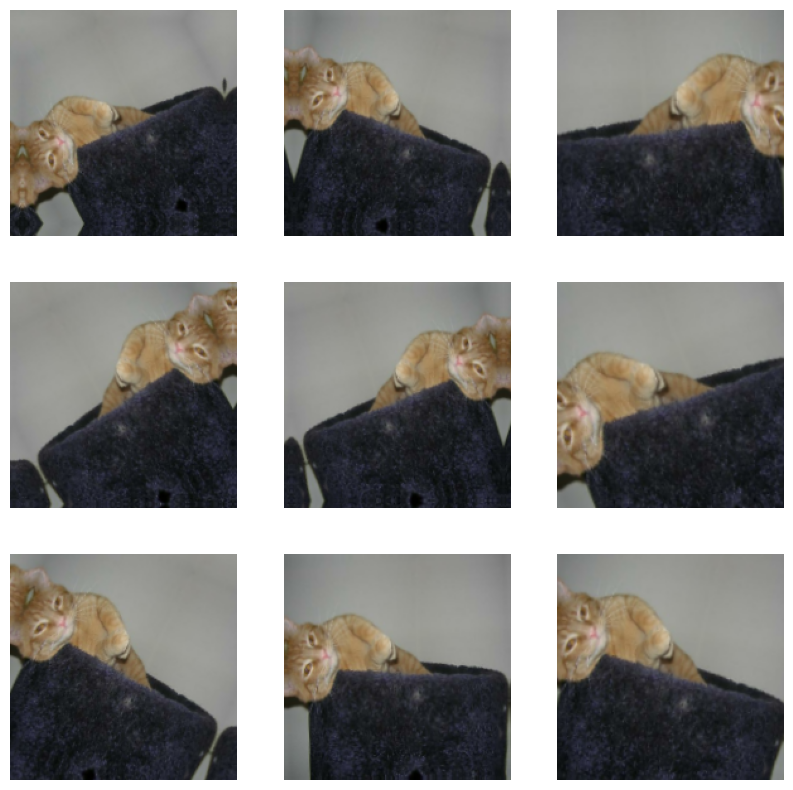

In [33]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [34]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [35]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 10s 104ms/step - loss: 0.6973 - accuracy: 0.5140 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 8s 125ms/step - loss: 0.6882 - accuracy: 0.5415 - val_loss: 0.6736 - val_accuracy: 0.6090
Epoch 3/50
63/63 [==============================] - 8s 113ms/step - loss: 0.6642 - accuracy: 0.5855 - val_loss: 0.6586 - val_accuracy: 0.5900
Epoch 4/50
63/63 [==============================] - 8s 111ms/step - loss: 0.6446 - accuracy: 0.6410 - val_loss: 0.6193 - val_accuracy: 0.6520
Epoch 5/50
63/63 [==============================] - 8s 124ms/step - loss: 0.6183 - accuracy: 0.6555 - val_loss: 0.7549 - val_accuracy: 0.5990
Epoch 6/50
63/63 [==============================] - 7s 104ms/step - loss: 0.6147 - accuracy: 0.6635 - val_loss: 0.6127 - val_accuracy: 0.6370
Epoch 7/50
63/63 [==============================] - 8s 121ms/step - loss: 0.6140 - accuracy: 0.6675 - val_loss: 0.6520 - val_accuracy: 0.6420
Epoch

**Evaluating the model on the test set**

In [36]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 53ms/step - loss: 0.4842 - accuracy: 0.8100
Test accuracy: 0.810


Question 2   Before dropout and data augmentation, our accuray is 71%, but after we use data augmentation and dropout, we achieved 81% accuary. Thus, we get 10% performance improvement. 

**Question 3**

Downloading the data.

In [37]:
from google.colab import drive
drive.mount('/content/drive')
import os, shutil, pathlib

new_base_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Building the model.

In [38]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [39]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

Configuring the model for training.

In [40]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Data preprocessing.

In [41]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir  / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir  / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
   new_base_dir  / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Increase the training sample to 2000.

In [42]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(2000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [43]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [44]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [45]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


Displaying the shapes of the data and labels yielded by the Dataset.

In [46]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Fitting the model using a Dataset.

In [47]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=40,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/40
63/63 [==============================] - 12s 153ms/step - loss: 0.7139 - accuracy: 0.4895 - val_loss: 0.6929 - val_accuracy: 0.5020
Epoch 2/40
63/63 [==============================] - 8s 109ms/step - loss: 0.6956 - accuracy: 0.5190 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 3/40
63/63 [==============================] - 8s 119ms/step - loss: 0.6923 - accuracy: 0.5275 - val_loss: 0.6839 - val_accuracy: 0.5200
Epoch 4/40
63/63 [==============================] - 7s 100ms/step - loss: 0.6829 - accuracy: 0.5520 - val_loss: 0.6873 - val_accuracy: 0.5330
Epoch 5/40
63/63 [==============================] - 8s 128ms/step - loss: 0.6617 - accuracy: 0.6245 - val_loss: 0.6631 - val_accuracy: 0.5870
Epoch 6/40
63/63 [==============================] - 7s 110ms/step - loss: 0.6446 - accuracy: 0.6500 - val_loss: 0.6937 - val_accuracy: 0.5950
Epoch 7/40
63/63 [==============================] - 8s 110ms/step - loss: 0.6099 - accuracy: 0.6665 - val_loss: 0.6737 - val_accuracy: 0.6120
Epoch

Displaying curves of loss and accuracy during training.

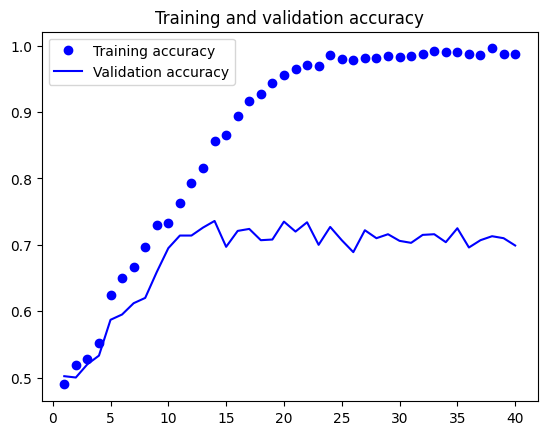

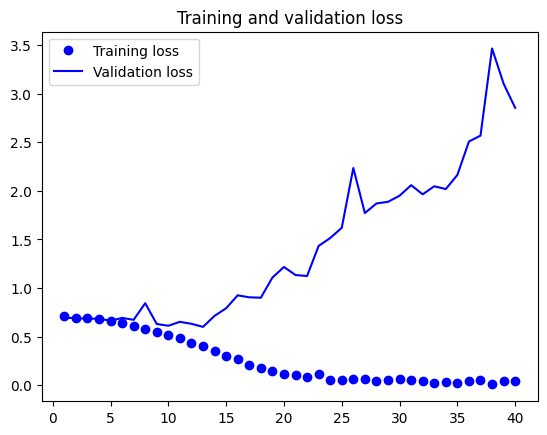

In [48]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [49]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 52ms/step - loss: 0.6264 - accuracy: 0.7080
Test accuracy: 0.708


**Define a data augmentation stage to add to an image model**

In [50]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

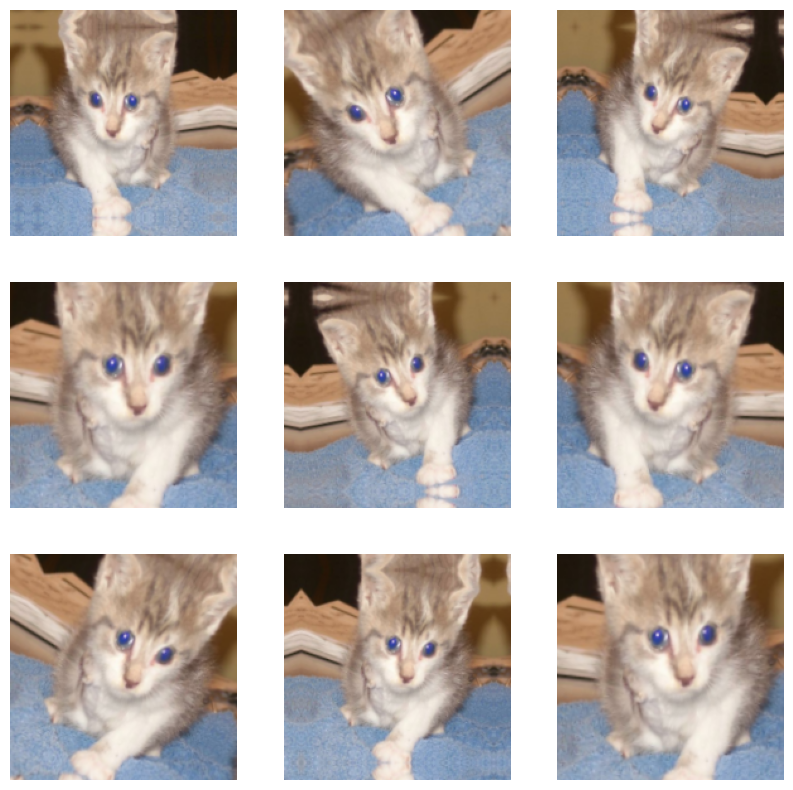

In [51]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [52]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [53]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=110,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/110
63/63 [==============================] - 10s 124ms/step - loss: 0.7018 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/110
63/63 [==============================] - 8s 118ms/step - loss: 0.6954 - accuracy: 0.5050 - val_loss: 0.6912 - val_accuracy: 0.5320
Epoch 3/110
63/63 [==============================] - 7s 103ms/step - loss: 0.6920 - accuracy: 0.5390 - val_loss: 0.6859 - val_accuracy: 0.5230
Epoch 4/110
63/63 [==============================] - 9s 130ms/step - loss: 0.6901 - accuracy: 0.5965 - val_loss: 0.6624 - val_accuracy: 0.6010
Epoch 5/110
63/63 [==============================] - 8s 124ms/step - loss: 0.6565 - accuracy: 0.6175 - val_loss: 0.9379 - val_accuracy: 0.5410
Epoch 6/110
63/63 [==============================] - 8s 114ms/step - loss: 0.6580 - accuracy: 0.6345 - val_loss: 0.6320 - val_accuracy: 0.6400
Epoch 7/110
63/63 [==============================] - 7s 104ms/step - loss: 0.6332 - accuracy: 0.6485 - val_loss: 0.6638 - val_accuracy: 0.615

**Evaluating the model on the test set**

In [54]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 57ms/step - loss: 0.4514 - accuracy: 0.8130
Test accuracy: 0.813


Question 3   Before dropout and data augmentation, our accuray is 71%, but after we use data augmentation and dropout, we achieved 81% accuary. Thus, we get 10% performance improvement. 

**Question 4**

Repeat step 1 with a pretrained network.

Downloading the data.

In [55]:
from google.colab import drive
drive.mount('/content/drive')
import os, shutil, pathlib

new_base_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Building the model.

In [56]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [57]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

Configuring the model for training.

In [58]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Data preprocessing.

In [59]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir  / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir  / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
   new_base_dir  / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Start initially with a training sample of 1000.

In [60]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [61]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [62]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [63]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


Displaying the shapes of the data and labels yielded by the Dataset.

In [64]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Fitting the model using a Dataset.

In [65]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 12s 138ms/step - loss: 0.6956 - accuracy: 0.4990 - val_loss: 0.6914 - val_accuracy: 0.4990
Epoch 2/30
63/63 [==============================] - 7s 101ms/step - loss: 0.6986 - accuracy: 0.5580 - val_loss: 0.6827 - val_accuracy: 0.5870
Epoch 3/30
63/63 [==============================] - 8s 120ms/step - loss: 0.6656 - accuracy: 0.6150 - val_loss: 0.6499 - val_accuracy: 0.6180
Epoch 4/30
63/63 [==============================] - 7s 110ms/step - loss: 0.6302 - accuracy: 0.6435 - val_loss: 0.6146 - val_accuracy: 0.6570
Epoch 5/30
63/63 [==============================] - 8s 110ms/step - loss: 0.5968 - accuracy: 0.6910 - val_loss: 0.5562 - val_accuracy: 0.7060
Epoch 6/30
63/63 [==============================] - 8s 122ms/step - loss: 0.5594 - accuracy: 0.7160 - val_loss: 0.5722 - val_accuracy: 0.6930
Epoch 7/30
63/63 [==============================] - 7s 102ms/step - loss: 0.5203 - accuracy: 0.7340 - val_loss: 0.5828 - val_accuracy: 0.6950
Epoch

Displaying curves of loss and accuracy during training.

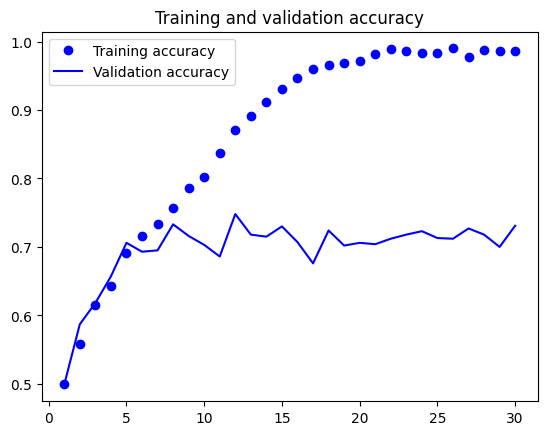

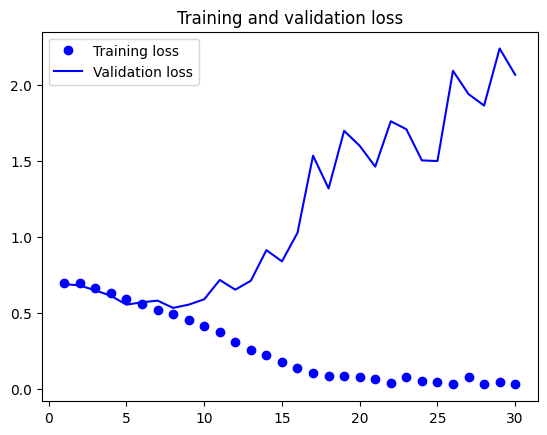

In [66]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [67]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 53ms/step - loss: 0.5677 - accuracy: 0.7150
Test accuracy: 0.715


**Define a data augmentation stage to add to an image model**

In [68]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

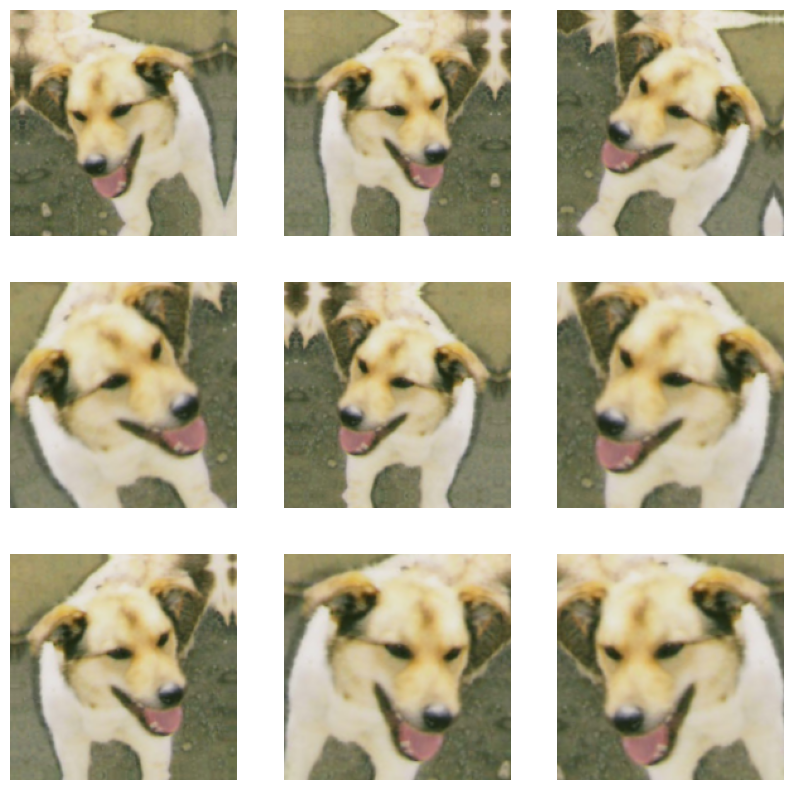

In [69]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [70]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [71]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 10s 116ms/step - loss: 0.7082 - accuracy: 0.5070 - val_loss: 0.6914 - val_accuracy: 0.4990
Epoch 2/100
63/63 [==============================] - 8s 124ms/step - loss: 0.6925 - accuracy: 0.5340 - val_loss: 0.6873 - val_accuracy: 0.5790
Epoch 3/100
63/63 [==============================] - 7s 103ms/step - loss: 0.6854 - accuracy: 0.5605 - val_loss: 0.6702 - val_accuracy: 0.6090
Epoch 4/100
63/63 [==============================] - 7s 101ms/step - loss: 0.6703 - accuracy: 0.5945 - val_loss: 0.6235 - val_accuracy: 0.6690
Epoch 5/100
63/63 [==============================] - 9s 131ms/step - loss: 0.6533 - accuracy: 0.6200 - val_loss: 0.6058 - val_accuracy: 0.6680
Epoch 6/100
63/63 [==============================] - 7s 101ms/step - loss: 0.6158 - accuracy: 0.6550 - val_loss: 0.6383 - val_accuracy: 0.6340
Epoch 7/100
63/63 [==============================] - 7s 102ms/step - loss: 0.6172 - accuracy: 0.6665 - val_loss: 0.6436 - val_accuracy: 0.624

**Evaluating the model on the test set**

In [72]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 53ms/step - loss: 0.4082 - accuracy: 0.8300
Test accuracy: 0.830


## Leveraging a pretrained model.

In [75]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [76]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation.

In [77]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

train_features.shape

1/1 [==============================] - 0s 18ms/step


(2000, 5, 5, 512)

# Defining and training the densely connected classifier.

In [78]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 3s 12ms/step - loss: 17.6028 - accuracy: 0.9195 - val_loss: 3.9113 - val_accuracy: 0.9670
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 2.7345 - accuracy: 0.9745 - val_loss: 3.4243 - val_accuracy: 0.9770
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.5217 - accuracy: 0.9890 - val_loss: 5.1123 - val_accuracy: 0.9700
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.2305 - accuracy: 0.9900 - val_loss: 5.8374 - val_accuracy: 0.9670
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.3820 - accuracy: 0.9960 - val_loss: 5.3024 - val_accuracy: 0.9700
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 0.3600 - accuracy: 0.9950 - val_loss: 4.0500 - val_accuracy: 0.9760
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.5718 - accuracy: 0.9940 - val_loss: 6.3725 - val_accuracy: 0.9670
Epoch 8/20
63/63 [

# Plotting the results. 

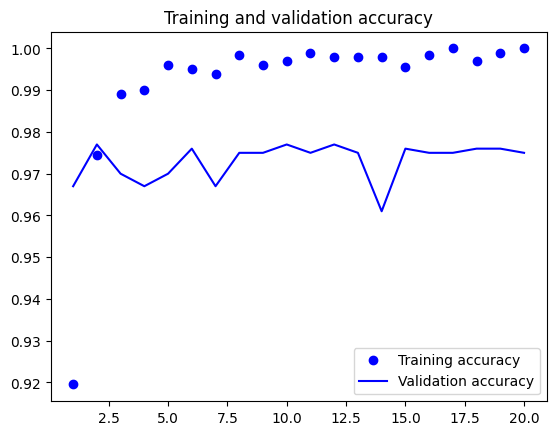

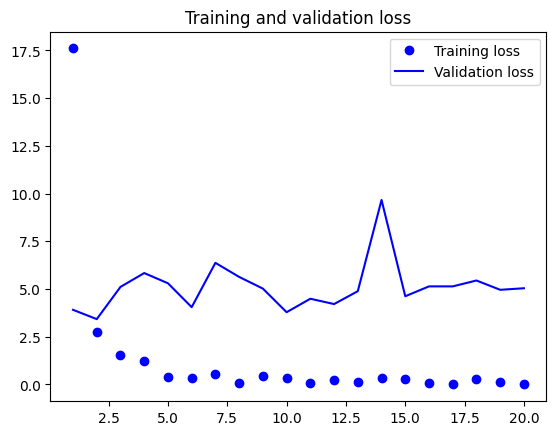

In [79]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation.

In [80]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [81]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [82]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base.

In [83]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [84]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 14s 186ms/step - loss: 15.3732 - accuracy: 0.8905 - val_loss: 2.8436 - val_accuracy: 0.9700
Epoch 2/50
63/63 [==============================] - 10s 159ms/step - loss: 6.5117 - accuracy: 0.9400 - val_loss: 3.5516 - val_accuracy: 0.9780
Epoch 3/50
63/63 [==============================] - 12s 174ms/step - loss: 4.6680 - accuracy: 0.9590 - val_loss: 2.7379 - val_accuracy: 0.9760
Epoch 4/50
63/63 [==============================] - 11s 162ms/step - loss: 4.7999 - accuracy: 0.9635 - val_loss: 2.6533 - val_accuracy: 0.9820
Epoch 5/50
63/63 [==============================] - 12s 183ms/step - loss: 4.5140 - accuracy: 0.9655 - val_loss: 2.4172 - val_accuracy: 0.9810
Epoch 6/50
63/63 [==============================] - 11s 164ms/step - loss: 3.7578 - accuracy: 0.9670 - val_loss: 3.0434 - val_accuracy: 0.9760
Epoch 7/50
63/63 [==============================] - 11s 166ms/step - loss: 2.6383 - accuracy: 0.9680 - val_loss: 3.3834 - val_accuracy: 0.975

**Evaluating the model on the test set**

In [85]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 94ms/step - loss: 2.2310 - accuracy: 0.9780
Test accuracy: 0.978


### Fine-tuning a pretrained model

In [86]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [87]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [88]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

Epoch 1/30
63/63 [==============================] - 14s 185ms/step - loss: 0.4368 - accuracy: 0.9905 - val_loss: 1.8306 - val_accuracy: 0.9760
Epoch 2/30
63/63 [==============================] - 12s 177ms/step - loss: 0.5115 - accuracy: 0.9890 - val_loss: 2.1713 - val_accuracy: 0.9770
Epoch 3/30
63/63 [==============================] - 13s 195ms/step - loss: 0.3897 - accuracy: 0.9905 - val_loss: 1.8888 - val_accuracy: 0.9730
Epoch 4/30
63/63 [==============================] - 13s 196ms/step - loss: 0.3307 - accuracy: 0.9915 - val_loss: 2.0669 - val_accuracy: 0.9730
Epoch 5/30
63/63 [==============================] - 13s 196ms/step - loss: 0.1046 - accuracy: 0.9955 - val_loss: 2.0730 - val_accuracy: 0.9700
Epoch 6/30
63/63 [==============================] - 11s 168ms/step - loss: 0.3648 - accuracy: 0.9925 - val_loss: 1.9699 - val_accuracy: 0.9770
Epoch 7/30
63/63 [==============================] - 11s 169ms/step - loss: 0.1222 - accuracy: 0.9960 - val_loss: 2.0174 - val_accuracy: 0.9750

**Repeat step 2 with a pretrained network**.

Downloading the data.

In [89]:
from google.colab import drive
drive.mount('/content/drive')
import os, shutil, pathlib

new_base_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Building the model.

In [90]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [91]:
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_9 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_45 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                     

Configuring the model for training.

In [92]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Data preprocessing.

In [93]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir  / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir  / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
   new_base_dir  / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Start initially with a training sample of 500.

In [94]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(500, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [95]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [96]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [97]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


Displaying the shapes of the data and labels yielded by the Dataset.

In [98]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Fitting the model using a Dataset.

In [99]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 12s 152ms/step - loss: 0.7056 - accuracy: 0.5020 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 7s 103ms/step - loss: 0.7094 - accuracy: 0.5070 - val_loss: 0.6929 - val_accuracy: 0.5020
Epoch 3/20
63/63 [==============================] - 8s 120ms/step - loss: 0.7002 - accuracy: 0.5310 - val_loss: 0.7160 - val_accuracy: 0.4990
Epoch 4/20
63/63 [==============================] - 7s 100ms/step - loss: 0.6853 - accuracy: 0.5655 - val_loss: 0.6896 - val_accuracy: 0.5500
Epoch 5/20
63/63 [==============================] - 7s 100ms/step - loss: 0.6627 - accuracy: 0.6115 - val_loss: 0.6650 - val_accuracy: 0.6100
Epoch 6/20
63/63 [==============================] - 8s 122ms/step - loss: 0.6410 - accuracy: 0.6425 - val_loss: 0.6496 - val_accuracy: 0.6210
Epoch 7/20
63/63 [==============================] - 7s 104ms/step - loss: 0.5989 - accuracy: 0.6825 - val_loss: 0.6158 - val_accuracy: 0.6570
Epoch

Displaying curves of loss and accuracy during training.

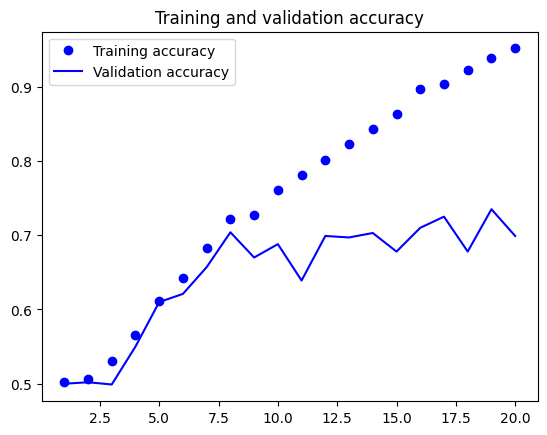

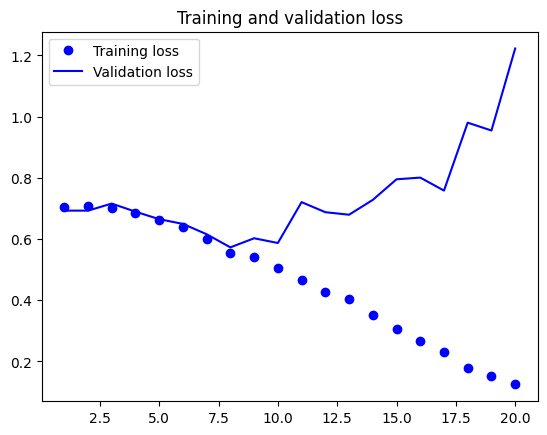

In [100]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [101]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 73ms/step - loss: 0.5677 - accuracy: 0.7190
Test accuracy: 0.719


**Define a data augmentation stage to add to an image model**

In [102]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

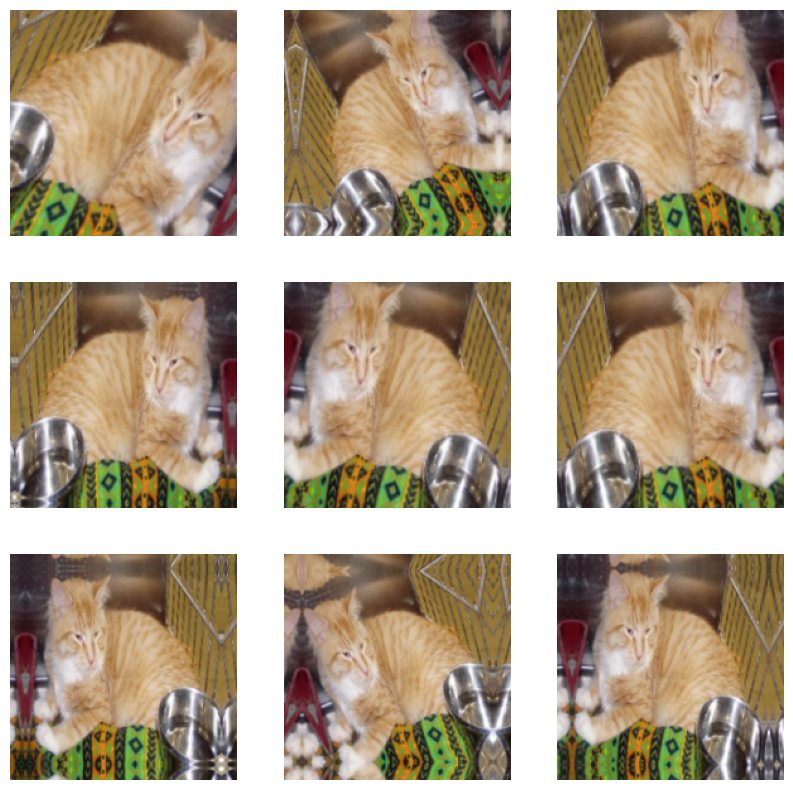

In [103]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [104]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [105]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 10s 119ms/step - loss: 0.7029 - accuracy: 0.4985 - val_loss: 0.7074 - val_accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 7s 103ms/step - loss: 0.6961 - accuracy: 0.5115 - val_loss: 0.7088 - val_accuracy: 0.5000
Epoch 3/50
63/63 [==============================] - 8s 122ms/step - loss: 0.6939 - accuracy: 0.5085 - val_loss: 0.6919 - val_accuracy: 0.5060
Epoch 4/50
63/63 [==============================] - 7s 111ms/step - loss: 0.6954 - accuracy: 0.5170 - val_loss: 0.6964 - val_accuracy: 0.5030
Epoch 5/50
63/63 [==============================] - 7s 104ms/step - loss: 0.6858 - accuracy: 0.5590 - val_loss: 0.6593 - val_accuracy: 0.6070
Epoch 6/50
63/63 [==============================] - 7s 105ms/step - loss: 0.6783 - accuracy: 0.6095 - val_loss: 0.6304 - val_accuracy: 0.6740
Epoch 7/50
63/63 [==============================] - 8s 121ms/step - loss: 0.6459 - accuracy: 0.6395 - val_loss: 0.6230 - val_accuracy: 0.6760
Epoch

**Evaluating the model on the test set**

In [106]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 53ms/step - loss: 0.4469 - accuracy: 0.8270
Test accuracy: 0.827


## Leveraging a pretrained model.

In [108]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [109]:
 conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation.

In [110]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

train_features.shape

1/1 [==============================] - 0s 23ms/step


(2000, 5, 5, 512)

# Defining and training the densely connected classifier.

In [158]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [159]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]

In [161]:
history = model.fit(
    train_features, train_labels,
    epochs=10,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 1s 10ms/step - loss: 0.9832 - accuracy: 0.9910 - val_loss: 7.1246 - val_accuracy: 0.9650
Epoch 2/10
63/63 [==============================] - 1s 13ms/step - loss: 1.0757 - accuracy: 0.9915 - val_loss: 8.1487 - val_accuracy: 0.9630
Epoch 3/10
63/63 [==============================] - 1s 14ms/step - loss: 1.6717 - accuracy: 0.9905 - val_loss: 4.2857 - val_accuracy: 0.9750
Epoch 4/10
63/63 [==============================] - 1s 15ms/step - loss: 0.2578 - accuracy: 0.9970 - val_loss: 4.3941 - val_accuracy: 0.9760
Epoch 5/10
63/63 [==============================] - 1s 10ms/step - loss: 0.8626 - accuracy: 0.9945 - val_loss: 9.8511 - val_accuracy: 0.9640
Epoch 6/10
63/63 [==============================] - 1s 9ms/step - loss: 0.6166 - accuracy: 0.9965 - val_loss: 4.5455 - val_accuracy: 0.9760
Epoch 7/10
63/63 [==============================] - 1s 10ms/step - loss: 0.3818 - accuracy: 0.9975 - val_loss: 8.0276 - val_accuracy: 0.9670
Epoch 8/10
63/

Plotting the results.

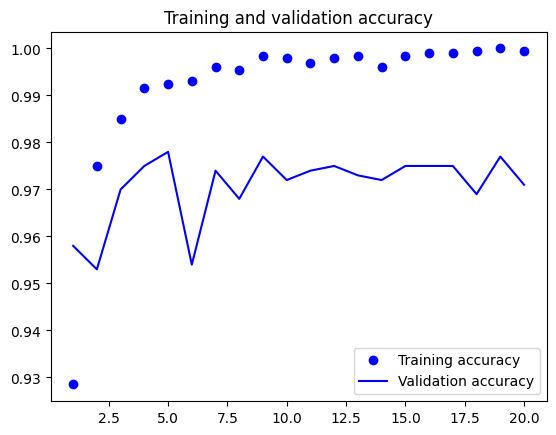

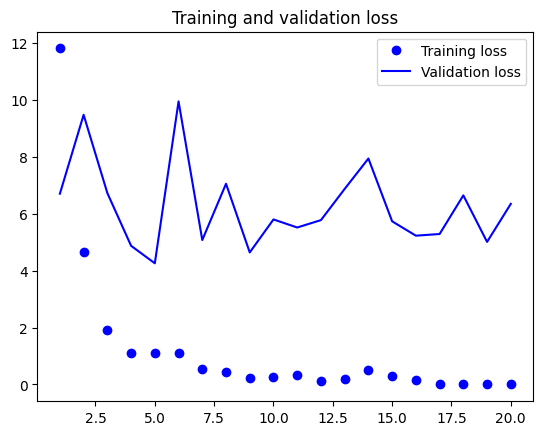

In [112]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation.

In [162]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [163]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [164]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base.

In [165]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [166]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 16s 189ms/step - loss: 21.2518 - accuracy: 0.8920 - val_loss: 2.8701 - val_accuracy: 0.9730
Epoch 2/30
63/63 [==============================] - 11s 162ms/step - loss: 6.8363 - accuracy: 0.9450 - val_loss: 8.1948 - val_accuracy: 0.9520
Epoch 3/30
63/63 [==============================] - 11s 166ms/step - loss: 5.4729 - accuracy: 0.9605 - val_loss: 3.2494 - val_accuracy: 0.9760
Epoch 4/30
63/63 [==============================] - 11s 158ms/step - loss: 5.9825 - accuracy: 0.9600 - val_loss: 6.7921 - val_accuracy: 0.9660
Epoch 5/30
63/63 [==============================] - 11s 165ms/step - loss: 4.4824 - accuracy: 0.9645 - val_loss: 4.5166 - val_accuracy: 0.9780
Epoch 6/30
63/63 [==============================] - 11s 173ms/step - loss: 3.9883 - accuracy: 0.9685 - val_loss: 2.9941 - val_accuracy: 0.9790
Epoch 7/30
63/63 [==============================] - 11s 170ms/step - loss: 3.1007 - accuracy: 0.9710 - val_loss: 3.5650 - val_accuracy: 0.978

**Evaluating the model on the test set**

In [167]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 5s 106ms/step - loss: 2.4364 - accuracy: 0.9770
Test accuracy: 0.977


### Fine-tuning a pretrained model

In [168]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [169]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [170]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

Epoch 1/20
63/63 [==============================] - 15s 202ms/step - loss: 0.4471 - accuracy: 0.9895 - val_loss: 1.5680 - val_accuracy: 0.9770
Epoch 2/20
63/63 [==============================] - 13s 204ms/step - loss: 0.4643 - accuracy: 0.9875 - val_loss: 2.0549 - val_accuracy: 0.9720
Epoch 3/20
63/63 [==============================] - 12s 184ms/step - loss: 0.3185 - accuracy: 0.9935 - val_loss: 1.5004 - val_accuracy: 0.9780
Epoch 4/20
63/63 [==============================] - 11s 172ms/step - loss: 0.3191 - accuracy: 0.9900 - val_loss: 1.8974 - val_accuracy: 0.9760
Epoch 5/20
63/63 [==============================] - 11s 174ms/step - loss: 0.3813 - accuracy: 0.9895 - val_loss: 2.0834 - val_accuracy: 0.9770
Epoch 6/20
63/63 [==============================] - 12s 178ms/step - loss: 0.2801 - accuracy: 0.9920 - val_loss: 1.7705 - val_accuracy: 0.9750
Epoch 7/20
63/63 [==============================] - 12s 171ms/step - loss: 0.3610 - accuracy: 0.9920 - val_loss: 1.6601 - val_accuracy: 0.9760

***Repeat step 3 with a pretrained network. ***

Downloading the data.

In [123]:
from google.colab import drive
drive.mount('/content/drive')
import os, shutil, pathlib

new_base_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Building the model.

In [124]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [125]:
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_55 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                     

Configuring the model for training.

In [126]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Data preprocessing.

In [127]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir  / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir  / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
   new_base_dir  / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Start initially with a training sample of 2000.

In [128]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(2000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [129]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [130]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [131]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


Displaying the shapes of the data and labels yielded by the Dataset.

In [132]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Fitting the model using a Dataset.

In [133]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=40,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/40
63/63 [==============================] - 10s 105ms/step - loss: 0.6969 - accuracy: 0.5120 - val_loss: 0.6925 - val_accuracy: 0.5090
Epoch 2/40
63/63 [==============================] - 8s 121ms/step - loss: 0.6948 - accuracy: 0.5045 - val_loss: 0.6925 - val_accuracy: 0.5100
Epoch 3/40
63/63 [==============================] - 7s 101ms/step - loss: 0.6944 - accuracy: 0.5245 - val_loss: 0.6891 - val_accuracy: 0.5450
Epoch 4/40
63/63 [==============================] - 9s 126ms/step - loss: 0.6845 - accuracy: 0.5820 - val_loss: 0.6725 - val_accuracy: 0.5810
Epoch 5/40
63/63 [==============================] - 8s 121ms/step - loss: 0.6433 - accuracy: 0.6320 - val_loss: 0.6322 - val_accuracy: 0.6400
Epoch 6/40
63/63 [==============================] - 7s 102ms/step - loss: 0.6129 - accuracy: 0.6740 - val_loss: 0.5998 - val_accuracy: 0.6710
Epoch 7/40
63/63 [==============================] - 8s 119ms/step - loss: 0.5753 - accuracy: 0.7050 - val_loss: 0.6241 - val_accuracy: 0.6630
Epoch

Displaying curves of loss and accuracy during training.

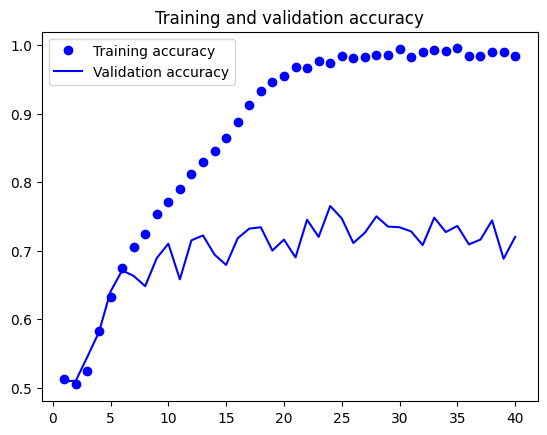

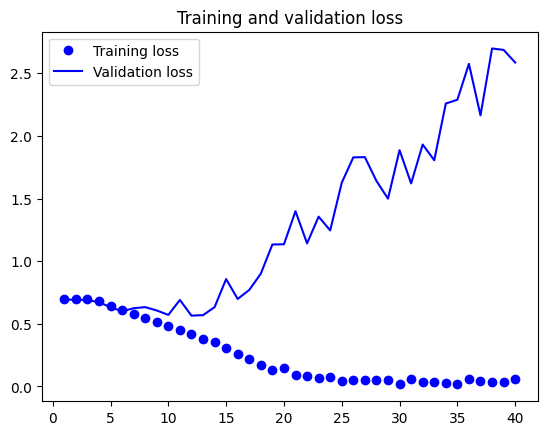

In [134]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [135]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 53ms/step - loss: 0.6035 - accuracy: 0.6920
Test accuracy: 0.692


**Define a data augmentation stage to add to an image model**

In [136]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

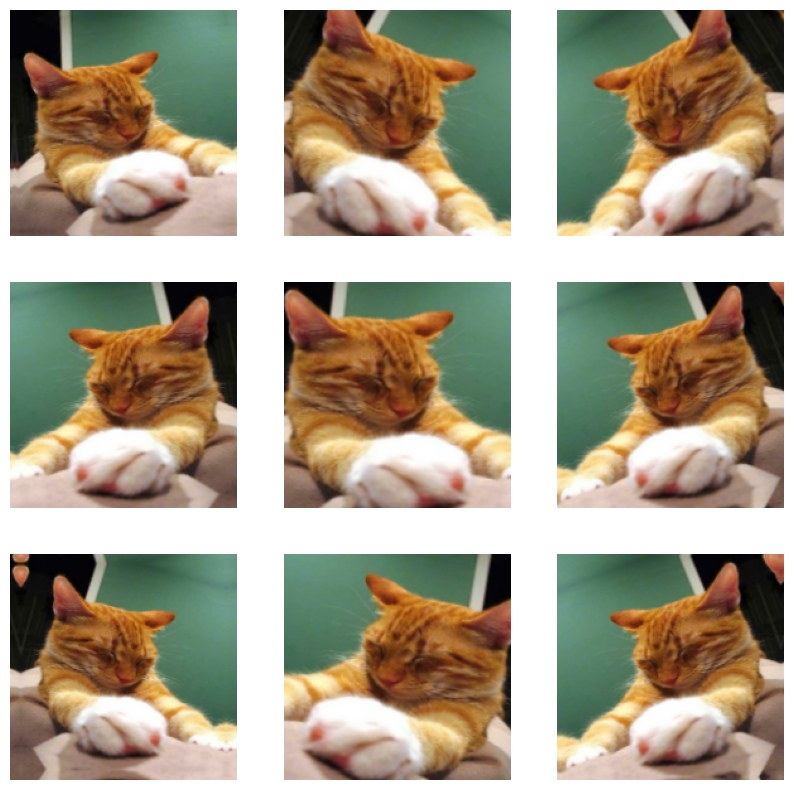

In [137]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [138]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [139]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=110,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/110
63/63 [==============================] - 11s 109ms/step - loss: 0.7115 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/110
63/63 [==============================] - 8s 124ms/step - loss: 0.6942 - accuracy: 0.5010 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 3/110
63/63 [==============================] - 7s 104ms/step - loss: 0.6946 - accuracy: 0.5055 - val_loss: 0.6909 - val_accuracy: 0.5810
Epoch 4/110
63/63 [==============================] - 8s 124ms/step - loss: 0.6933 - accuracy: 0.5190 - val_loss: 0.6909 - val_accuracy: 0.4990
Epoch 5/110
63/63 [==============================] - 7s 105ms/step - loss: 0.6846 - accuracy: 0.5560 - val_loss: 0.6707 - val_accuracy: 0.5770
Epoch 6/110
63/63 [==============================] - 8s 114ms/step - loss: 0.6715 - accuracy: 0.6105 - val_loss: 0.6621 - val_accuracy: 0.5960
Epoch 7/110
63/63 [==============================] - 8s 124ms/step - loss: 0.6466 - accuracy: 0.6335 - val_loss: 0.6479 - val_accuracy: 0.610

**Evaluating the model on the test set**

In [140]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 54ms/step - loss: 0.4328 - accuracy: 0.8330
Test accuracy: 0.833


## Leveraging a pretrained model.

In [141]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [142]:
 conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation.

In [143]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

train_features.shape

1/1 [==============================] - 0s 23ms/step


(2000, 5, 5, 512)

# Defining and training the densely connected classifier.

In [144]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=30,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 2s 14ms/step - loss: 13.0195 - accuracy: 0.9300 - val_loss: 3.6748 - val_accuracy: 0.9640
Epoch 2/30
63/63 [==============================] - 0s 8ms/step - loss: 3.0593 - accuracy: 0.9770 - val_loss: 4.4975 - val_accuracy: 0.9680
Epoch 3/30
63/63 [==============================] - 0s 7ms/step - loss: 2.0033 - accuracy: 0.9850 - val_loss: 5.0006 - val_accuracy: 0.9710
Epoch 4/30
63/63 [==============================] - 0s 8ms/step - loss: 0.7597 - accuracy: 0.9930 - val_loss: 19.7978 - val_accuracy: 0.9140
Epoch 5/30
63/63 [==============================] - 0s 7ms/step - loss: 1.6666 - accuracy: 0.9870 - val_loss: 4.4216 - val_accuracy: 0.9730
Epoch 6/30
63/63 [==============================] - 1s 9ms/step - loss: 0.6883 - accuracy: 0.9945 - val_loss: 3.4032 - val_accuracy: 0.9800
Epoch 7/30
63/63 [==============================] - 0s 5ms/step - loss: 0.4158 - accuracy: 0.9965 - val_loss: 4.5862 - val_accuracy: 0.9780
Epoch 8/30
63/63 

# Plotting the results. 

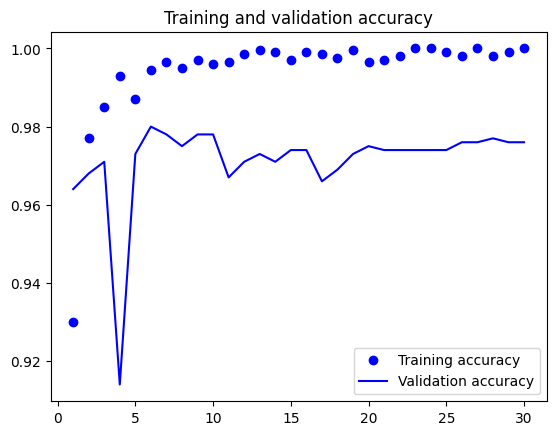

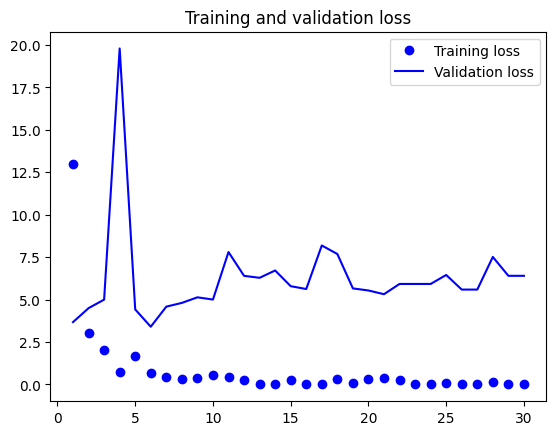

In [145]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation.

In [146]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [147]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [148]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base.

In [149]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [150]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=60,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/60
63/63 [==============================] - 13s 172ms/step - loss: 17.8330 - accuracy: 0.8940 - val_loss: 9.0649 - val_accuracy: 0.9510
Epoch 2/60
63/63 [==============================] - 11s 170ms/step - loss: 7.7168 - accuracy: 0.9475 - val_loss: 4.9323 - val_accuracy: 0.9710
Epoch 3/60
63/63 [==============================] - 11s 169ms/step - loss: 5.5602 - accuracy: 0.9510 - val_loss: 3.5902 - val_accuracy: 0.9710
Epoch 4/60
63/63 [==============================] - 10s 155ms/step - loss: 5.3647 - accuracy: 0.9590 - val_loss: 4.1934 - val_accuracy: 0.9720
Epoch 5/60
63/63 [==============================] - 11s 161ms/step - loss: 4.4219 - accuracy: 0.9640 - val_loss: 4.7088 - val_accuracy: 0.9690
Epoch 6/60
63/63 [==============================] - 10s 160ms/step - loss: 3.1813 - accuracy: 0.9740 - val_loss: 5.1194 - val_accuracy: 0.9670
Epoch 7/60
63/63 [==============================] - 11s 170ms/step - loss: 4.1066 - accuracy: 0.9690 - val_loss: 5.2242 - val_accuracy: 0.973

**Evaluating the model on the test set**

In [151]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 95ms/step - loss: 1.9962 - accuracy: 0.9780
Test accuracy: 0.978


### Fine-tuning a pretrained model

In [152]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [153]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [156]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [157]:
history = model.fit(
    train_dataset,
    epochs=40,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/40
63/63 [==============================] - 14s 181ms/step - loss: 0.1396 - accuracy: 0.9950 - val_loss: 1.8562 - val_accuracy: 0.9770
Epoch 2/40
63/63 [==============================] - 12s 181ms/step - loss: 0.1585 - accuracy: 0.9945 - val_loss: 1.6339 - val_accuracy: 0.9840
Epoch 3/40
63/63 [==============================] - 12s 181ms/step - loss: 0.1726 - accuracy: 0.9965 - val_loss: 1.6457 - val_accuracy: 0.9800
Epoch 4/40
63/63 [==============================] - 12s 182ms/step - loss: 0.0885 - accuracy: 0.9965 - val_loss: 1.4563 - val_accuracy: 0.9840
Epoch 5/40
63/63 [==============================] - 11s 169ms/step - loss: 0.0277 - accuracy: 0.9975 - val_loss: 1.4765 - val_accuracy: 0.9840
Epoch 6/40
63/63 [==============================] - 12s 176ms/step - loss: 0.1145 - accuracy: 0.9960 - val_loss: 2.3733 - val_accuracy: 0.9800
Epoch 7/40
63/63 [==============================] - 11s 175ms/step - loss: 0.1120 - accuracy: 0.9965 - val_loss: 1.9147 - val_accuracy: 0.9800

In [155]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 92ms/step - loss: 1.7249 - accuracy: 0.9770
Test accuracy: 0.977
